In [125]:
#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


import numpy as np

#Evaluation Metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
 

#Models
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#Ensemble Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# 1. Preprocessing Steps

# Read, Drop X__2, conver values to 4 decimal, clean whitespaces 

In [126]:
import pandas as pd 

df = pd.read_csv('Test-set_2 Anonymized.csv') # No Duplicates 
df.drop(['X__2'],axis=1,inplace=True)
df = round(df, 4)
df.replace(' ', '', regex=True)

,X__1,X__3,X__4,X__5,X__6,X__7,X__8,X__9,X__10,X__11,...,X__45,X__46,X__47,X__48,X__49,X__50,X__51,X__52,X__53,X__54
0,V1_0,74.7,55.5507,7.0124,3.6561,5.2000,59.3000,18.7687,6.8000,3.7791,...,17.9000,96.2688,185.4702,18.0512,102.5695,5.1000,49.6425,233.0000,87.4281,129.5000
1,V1_0,74.7,27.0795,0.4410,455.7958,5.2000,69.4519,10.0974,6.8000,1.7844,...,56.2571,72.2044,210.7242,664.1914,88.7042,6.3731,43.4156,233.0000,76.8285,129.5000
2,V1_0,74.7,7.8338,0.1028,81.4202,5.2000,59.3000,5.3529,9.8845,0.8567,...,47.4011,210.3707,284.5412,255.8469,164.0262,5.1000,44.9585,233.0000,53.9090,129.5000
3,V1_0,74.7,3.8017,0.7499,0.3000,5.5607,59.3000,11.9074,6.8000,2.2116,...,249.8098,198.8412,206.2716,481.9353,113.6552,7.2929,77.9156,262.2195,145.0442,129.5000
4,V1_0,74.7,1.9598,0.7339,73.1735,41.6372,59.3000,11.9074,6.8000,3.0007,...,231.3329,276.9851,539.8339,687.1011,189.5546,8.2045,104.5126,649.1906,188.9007,129.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,V1_1,74.7,0.2000,1.0011,1.2869,5.2000,72.5012,6.5279,9.3100,1.6243,...,17.9000,548.3745,782.6957,646.7724,78.8568,9.2046,66.6735,233.0000,119.2088,129.5000
1968,V1_1,74.7,0.2000,0.9160,1.6127,5.2000,72.5012,6.5279,9.3100,1.5971,...,21.3403,171.3368,375.3253,487.8732,60.4377,9.2046,66.6735,358.5699,106.9407,145.2729
1969,V1_1,74.7,0.2000,0.0472,0.3747,5.2000,59.3000,9.1899,6.8000,0.3800,...,31.7989,440.0065,5639.3584,454.2659,58.1872,8.9189,165.7208,799.3433,539.2854,339.5659
1970,V1_1,74.7,0.7480,0.1176,1.7878,5.2000,144.4755,13.7174,6.8000,0.6182,...,17.9000,333.1604,2503.5534,434.1960,35.9000,5.1000,110.5635,378.0699,234.0235,129.5000


# Replace V1_0 with 0 V1_1 with 1 , convert column type to integer from object

In [127]:
df["X__1"].replace({"V1_0": "0", "V1_1": "1"}, inplace=True)
df["X__1"] = df["X__1"].astype('int')

In [128]:
df["X__1"].value_counts()

0    1175
1     797
Name: X__1, dtype: int64

# We have 15 records that not equals to 74.7 and 12 of them are 0 
# So I thought about converting these values to 0,it improves models a bit but I'm not gonna. Because this process will not be sustainable when new data comes in.


In [129]:
df[(df['X__3'] != 74.7) & (df['X__1'] == 0)]

,X__1,X__3,X__4,X__5,X__6,X__7,X__8,X__9,X__10,X__11,...,X__45,X__46,X__47,X__48,X__49,X__50,X__51,X__52,X__53,X__54
122,0,5861.4655,2.9183,0.2832,2.2637,5.2000,59.3000,11.2090,9.1730,0.6406,...,17.9000,274.8235,6935.5132,588.8339,35.9000,5.1476,42.9000,377.6307,382.8790,129.5000
155,0,2152.7537,0.2000,0.1368,1.1104,23.6078,67.3543,7.0491,7.6060,0.6513,...,17.9000,292.1260,3936.3089,82.7044,35.9000,9.1376,42.9000,841.3074,476.0876,129.5000
351,0,6681.9733,1.7623,0.2603,1.9193,7.2537,59.3000,12.1651,8.6528,0.2000,...,17.9000,148.6436,3943.4499,919.5413,35.9000,10.5366,42.9000,3284.3492,140.2625,129.5000
588,0,133.0422,7.0566,0.9501,20.5054,23.8907,187.6274,26.6590,22.5562,0.4407,...,61.8562,69.8800,151.0000,1209.5736,35.9000,9.5117,42.9000,812.3873,81.9237,129.5000
590,0,84.4757,1.6011,0.8063,11.2378,128.8118,224.9561,22.1924,17.3462,1.0798,...,77.1617,151.7802,937.0586,867.6374,35.9000,12.1526,42.9000,609.7303,152.3154,129.5000
622,0,116.1966,0.4981,1.0831,6.6281,29.5352,216.0352,9.4636,17.4884,0.9451,...,17.9000,678.2569,8418.0273,1273.3972,35.9000,5.1000,230.3930,1224.7040,780.3843,145.7527
892,0,92.3001,1.9044,1.8059,2.6745,25.0959,59.3000,9.2013,6.8000,0.7334,...,32.9104,496.4793,13158.9885,665.7046,75.1283,5.1000,188.2502,456.5949,572.9682,129.5000
913,0,6181.2225,0.2000,0.3174,2.2637,8.6020,59.3000,11.2090,6.9099,0.5035,...,17.9000,511.9152,3679.6728,161.5745,35.9000,5.1000,42.9000,398.8367,197.6889,129.5000
914,0,1080.0848,1.9307,0.2699,0.5894,5.2000,59.3000,3.6000,6.8000,0.6834,...,23.7000,453.1916,3577.8169,476.0882,94.0116,6.2107,61.9468,2011.1371,98.1749,129.5000
916,0,729.4251,0.2438,0.6111,2.7297,5.2000,59.3000,4.8529,6.8000,0.2000,...,24.1258,240.8192,1817.6740,409.1643,42.1027,8.3041,74.9389,1353.8743,171.6008,129.5000


# Checked for distribution of values on X__1 column

# For example X__25 values on X__1 

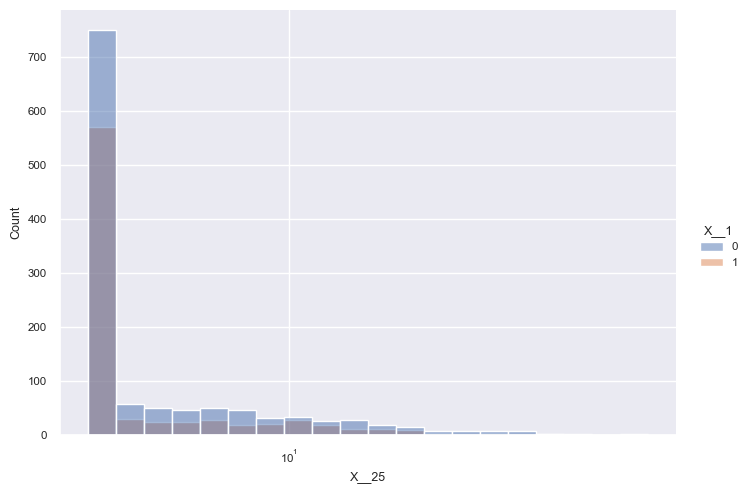

In [130]:
for i in range(25,26):
    a =  'X__'+f"{i}"
    sns.displot(
      data=df,
      x=a,
      hue="X__1",
      kind="hist",
      aspect=1.4,
      log_scale=10,
      bins=20
    )

In [131]:
df.head()

,X__1,X__3,X__4,X__5,X__6,X__7,X__8,X__9,X__10,X__11,...,X__45,X__46,X__47,X__48,X__49,X__50,X__51,X__52,X__53,X__54
0,0,74.7,55.5507,7.0124,3.6561,5.2000,59.3000,18.7687,6.8000,3.7791,...,17.9000,96.2688,185.4702,18.0512,102.5695,5.1000,49.6425,233.0000,87.4281,129.5
1,0,74.7,27.0795,0.4410,455.7958,5.2000,69.4519,10.0974,6.8000,1.7844,...,56.2571,72.2044,210.7242,664.1914,88.7042,6.3731,43.4156,233.0000,76.8285,129.5
2,0,74.7,7.8338,0.1028,81.4202,5.2000,59.3000,5.3529,9.8845,0.8567,...,47.4011,210.3707,284.5412,255.8469,164.0262,5.1000,44.9585,233.0000,53.9090,129.5
3,0,74.7,3.8017,0.7499,0.3000,5.5607,59.3000,11.9074,6.8000,2.2116,...,249.8098,198.8412,206.2716,481.9353,113.6552,7.2929,77.9156,262.2195,145.0442,129.5
4,0,74.7,1.9598,0.7339,73.1735,41.6372,59.3000,11.9074,6.8000,3.0007,...,231.3329,276.9851,539.8339,687.1011,189.5546,8.2045,104.5126,649.1906,188.9007,129.5


# Shows how many 1 or 0 are in the first 20 rows when the column is sorted from largest to smallest and duplicates are dropped.

In [132]:
def see(i):
    a =  'X__'+f"{i}"
    return df[['X__1',a]].sort_values(a).drop_duplicates().head(20)['X__1'].value_counts()


In [133]:
for i in range(3,5):
    print(see(i))

0    13
1     3
Name: X__1, dtype: int64
0    11
1     9
Name: X__1, dtype: int64


In [134]:
df.head()

,X__1,X__3,X__4,X__5,X__6,X__7,X__8,X__9,X__10,X__11,...,X__45,X__46,X__47,X__48,X__49,X__50,X__51,X__52,X__53,X__54
0,0,74.7,55.5507,7.0124,3.6561,5.2000,59.3000,18.7687,6.8000,3.7791,...,17.9000,96.2688,185.4702,18.0512,102.5695,5.1000,49.6425,233.0000,87.4281,129.5
1,0,74.7,27.0795,0.4410,455.7958,5.2000,69.4519,10.0974,6.8000,1.7844,...,56.2571,72.2044,210.7242,664.1914,88.7042,6.3731,43.4156,233.0000,76.8285,129.5
2,0,74.7,7.8338,0.1028,81.4202,5.2000,59.3000,5.3529,9.8845,0.8567,...,47.4011,210.3707,284.5412,255.8469,164.0262,5.1000,44.9585,233.0000,53.9090,129.5
3,0,74.7,3.8017,0.7499,0.3000,5.5607,59.3000,11.9074,6.8000,2.2116,...,249.8098,198.8412,206.2716,481.9353,113.6552,7.2929,77.9156,262.2195,145.0442,129.5
4,0,74.7,1.9598,0.7339,73.1735,41.6372,59.3000,11.9074,6.8000,3.0007,...,231.3329,276.9851,539.8339,687.1011,189.5546,8.2045,104.5126,649.1906,188.9007,129.5


# Plots for understanding distribution of data for understanding if its appropriate for some of the transformers like bucketizer.

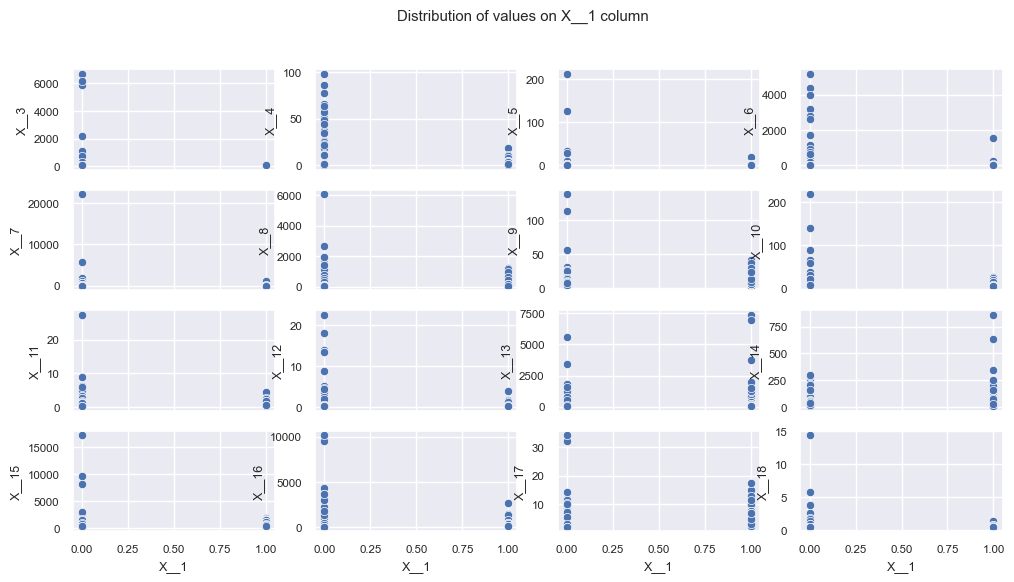

In [135]:
%matplotlib inline
sns.set(font_scale=0.75)
fig, axes = plt.subplots(4, 4, sharex=True, figsize=(12,6))
fig.suptitle('Distribution of values on X__1 column')
m=3
for i in range(0,4):
    k = i+3    
    a =  'X__'+f"{k}"    
    for j in range(0,4):       
        b =  'X__'+f"{m}" 
        sns.scatterplot(ax=axes[i, j],data=df, x="X__1", y=b)
        m=m+1  
    

# We need to shuffle the data because 0 and 1 values are grouped

In [136]:
df = df.sample(frac=1).reset_index(drop=True)

# Define Independent columns and our dependent column

In [137]:
y = df["X__1"]
X = df.iloc[:,1:]

In [138]:
X.head()

,X__3,X__4,X__5,X__6,X__7,X__8,X__9,X__10,X__11,X__12,...,X__45,X__46,X__47,X__48,X__49,X__50,X__51,X__52,X__53,X__54
0,74.7,1.6846,0.0850,6.9081,5.2,59.3000,7.6373,6.8000,1.9142,0.3000,...,17.9000,169.1095,2147.3822,495.3314,152.8370,5.2091,51.5261,1331.3527,85.2256,129.5000
1,74.7,0.9030,0.3595,11.2096,5.2,95.0499,12.4266,11.6892,0.4002,0.5087,...,17.9000,125.6460,188.3170,195.2303,35.9000,9.0240,75.8990,233.0000,133.9102,162.4696
2,74.7,1.1448,0.1314,0.4757,5.2,59.3000,13.0988,9.5142,0.5491,0.3691,...,48.9502,442.0735,3448.5073,775.6283,138.1145,13.9144,135.7493,1545.5264,149.8827,129.5000
3,74.7,2.5021,0.2355,1.2360,5.2,59.3000,6.4191,10.6245,1.5606,0.3445,...,79.3562,146.9478,1723.0106,145.4010,41.3980,13.9071,54.6601,233.0000,134.1015,129.5000
4,74.7,1.1529,0.1549,0.5884,5.2,59.3000,8.5923,6.8000,0.2000,0.3000,...,17.9000,230.6949,1113.3688,295.5072,35.9000,5.1000,42.9000,233.0000,211.7327,129.5000


# Split Data for Train and Test

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, train_size = .8)

# Define Model Evaluator Function

In [141]:
import warnings
warnings.filterwarnings("ignore")
arr2 = y_test.values
def ev(model, arrpreds):
    metrics=[]
    f1 = f1_score(arr2, arrpreds)
    ac = accuracy_score(arr2,arrpreds)
    prec = precision_score(arr2,arrpreds)
    rec = recall_score(arr2,arrpreds)
    crossvalf1 = cross_val_score(model, X, y, scoring="f1", cv=5)
    crossvalf1 = np.around(crossvalf1, decimals=3)
    maxcv = crossvalf1.max()    
    roc = roc_auc_score(arr2,arrpreds)
    
    metrics.append(f1)
    metrics.append(ac)
    metrics.append(prec)
    metrics.append(rec)
    metrics.append(maxcv)
    metrics.append(roc)
    metrics.append(crossvalf1)
        
    return metrics

# Function for predicting with models and append model evaluations metrics to DataFrame. 

In [142]:
def evalmodel(model):    
    arrpreds = model.fit(X_train, y_train).predict(X_test)
    y = ev(model,arrpreds)
    y = pd.Series(y)
    df = pd.DataFrame(data=y)      
    df = df.T    
    return df 

In [143]:
lr = LogisticRegression(random_state=42) 
gnb = GaussianNB()
svc= SVC(probability=True, random_state=42) 

In [144]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=None,
     min_samples_split=2, random_state=0)

dtc = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
     random_state=0)

etc = ExtraTreesClassifier(n_estimators=10, max_depth=None,
     min_samples_split=3, random_state=0)

In [145]:
abc = AdaBoostClassifier(n_estimators=100)



xgb = XGBClassifier(learning_rate=0.5,sampling_method="gradient_based",
                     tree_method="auto")

#Use this CatBoost model for training on GPU
#cbc = CatBoostClassifier(iterations=110, learning_rate=1, depth=2,task_type="GPU", devices='0:1') 

#Use this CatBoost model for training on CPU
cbc = CatBoostClassifier(thread_count=-1)

gbm = GradientBoostingClassifier(random_state=42)
 

hgbm = HistGradientBoostingClassifier(random_state=42)
 

# Define appropriate dataframe for model comparison:

In [146]:
comp = pd.DataFrame()
models=[lr,gnb,svc,rfc,dtc,etc,abc,xgb,cbc,gbm,hgbm]
modelsindex=['lr','gnb','svc','rfc','dtc','etc','abc','xgb','cbc','gbm','hgbm']

# Function that edits Comparison DataFrame

In [147]:
def edit(comp):
    comp.columns=['F1','Accuracy','Precision','Recall','MaxCV','ROC','CV_Scores']
    comp.index=modelsindex
    return comp

# Function that runs each model and adds it to DataFrame with its scores

In [148]:
for i in models:
    comp = pd.concat([comp,evalmodel(i)],axis=0)
edit(comp)

0:	learn: 0.5876209	total: 22.9ms	remaining: 2.5s
1:	learn: 0.5475849	total: 33.7ms	remaining: 1.82s
2:	learn: 0.5187308	total: 39.9ms	remaining: 1.42s
3:	learn: 0.5010936	total: 46ms	remaining: 1.22s
4:	learn: 0.4813800	total: 51.9ms	remaining: 1.09s
5:	learn: 0.4679547	total: 58ms	remaining: 1s
6:	learn: 0.4536554	total: 64.1ms	remaining: 943ms
7:	learn: 0.4387597	total: 70ms	remaining: 893ms
8:	learn: 0.4309499	total: 76.1ms	remaining: 854ms
9:	learn: 0.4258154	total: 82ms	remaining: 820ms
10:	learn: 0.4178440	total: 88ms	remaining: 792ms
11:	learn: 0.4097338	total: 94ms	remaining: 768ms
12:	learn: 0.4017112	total: 100ms	remaining: 746ms
13:	learn: 0.3892840	total: 106ms	remaining: 727ms
14:	learn: 0.3823788	total: 112ms	remaining: 709ms
15:	learn: 0.3742954	total: 118ms	remaining: 695ms
16:	learn: 0.3669043	total: 125ms	remaining: 682ms
17:	learn: 0.3606382	total: 132ms	remaining: 673ms
18:	learn: 0.3536569	total: 138ms	remaining: 662ms
19:	learn: 0.3494207	total: 145ms	remaining: 

,F1,Accuracy,Precision,Recall,MaxCV,ROC,CV_Scores
lr,0.577465,0.696203,0.725664,0.479532,0.634,0.67057,"[0.573, 0.634, 0.53, 0.564, 0.578]"
gnb,0.620952,0.496203,0.460452,0.953216,0.612,0.550269,"[0.611, 0.607, 0.612, 0.594, 0.601]"
svc,0.222222,0.592405,0.638889,0.134503,0.287,0.538234,"[0.145, 0.287, 0.154, 0.105, 0.206]"
rfc,0.636678,0.734177,0.779661,0.538012,0.707,0.71097,"[0.669, 0.707, 0.564, 0.642, 0.664]"
dtc,0.646154,0.708861,0.681818,0.614035,0.671,0.697643,"[0.671, 0.636, 0.616, 0.592, 0.601]"
etc,0.646667,0.731646,0.751938,0.567251,0.676,0.712197,"[0.626, 0.676, 0.637, 0.634, 0.62]"
abc,0.763314,0.797468,0.772455,0.754386,0.768,0.792372,"[0.742, 0.768, 0.691, 0.728, 0.703]"
gbc,0.73125,0.782278,0.785235,0.684211,0.763,0.770677,"[0.728, 0.763, 0.723, 0.757, 0.704]"
xgb,0.754717,0.802532,0.816327,0.701754,0.816,0.790609,"[0.771, 0.814, 0.732, 0.816, 0.758]"
cbc,0.740964,0.782278,0.763975,0.719298,0.796,0.774828,"[0.76, 0.796, 0.706, 0.753, 0.734]"


# According to our results I'll continue the process with hGBM, GBM, XGB AdaBoostClassifier and GradientBoostingClassifier and CatBoostClassifier

In [149]:
comp.sort_values("F1",ascending=False)

,F1,Accuracy,Precision,Recall,MaxCV,ROC,CV_Scores
hgbm,0.78125,0.822785,0.838926,0.730994,0.843,0.811926,"[0.796, 0.843, 0.707, 0.809, 0.78]"
gbm,0.765273,0.81519,0.85,0.695906,0.816,0.801078,"[0.78, 0.816, 0.719, 0.793, 0.756]"
abc,0.763314,0.797468,0.772455,0.754386,0.768,0.792372,"[0.742, 0.768, 0.691, 0.728, 0.703]"
xgb,0.754717,0.802532,0.816327,0.701754,0.816,0.790609,"[0.771, 0.814, 0.732, 0.816, 0.758]"
cbc,0.740964,0.782278,0.763975,0.719298,0.796,0.774828,"[0.76, 0.796, 0.706, 0.753, 0.734]"
gbc,0.73125,0.782278,0.785235,0.684211,0.763,0.770677,"[0.728, 0.763, 0.723, 0.757, 0.704]"
etc,0.646667,0.731646,0.751938,0.567251,0.676,0.712197,"[0.626, 0.676, 0.637, 0.634, 0.62]"
dtc,0.646154,0.708861,0.681818,0.614035,0.671,0.697643,"[0.671, 0.636, 0.616, 0.592, 0.601]"
rfc,0.636678,0.734177,0.779661,0.538012,0.707,0.71097,"[0.669, 0.707, 0.564, 0.642, 0.664]"
gnb,0.620952,0.496203,0.460452,0.953216,0.612,0.550269,"[0.611, 0.607, 0.612, 0.594, 0.601]"


## Because of  GBM and hGBM models are very similar, I'll be choosing one of them.
## To choose one of hGBM and GBM:  

# HGBM scales very well with big datasets compared to GBM. 

In [152]:
from sklearn.datasets import make_classification
from time import perf_counter

n_samples = 10**np.arange(2,6) # if you try this with 7 or 6 instead of 5 you can see the difference better 
tuples = [*zip(np.repeat(n_samples,2), np.tile(['gbm', 'hgbm'], 2))]
summary = pd.DataFrame(
    index=pd.MultiIndex.from_tuples(tuples, 
                                    names=["n_records", "model"])
)
models = [('gbm', GradientBoostingClassifier(random_state=42)), 
          ('hgbm', HistGradientBoostingClassifier(random_state=42))]
for n in n_samples:
    X, y = make_classification(n, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42
    )
    
    for name, model in models:
        start = perf_counter()
        model.fit(X_train, y_train)
        end = perf_counter()
        summary.loc[(n, name), 'fit_time'] = end-start
        start = perf_counter()
        y_proba = model.predict_proba(X_test)[:,1]
        end = perf_counter()
        summary.loc[(n, name), 'score_time'] = end-start
        
        summary.loc[(n, name), 'roc_auc'] = roc_auc_score(y_test, 
                                                          y_proba)
        y_pred = np.round(y_proba)
        summary.loc[(n, name), 'accuracy'] = accuracy_score(y_test, 
                                                            y_pred)
        summary.loc[(n, name), 'f1'] = f1_score(y_test, y_pred)
summary

fit_time  score_time   roc_auc  accuracy        f1
n_records model                                                     
100       gbm     0.033525    0.000341  0.933333   0.92000  0.909091
          hgbm    0.058248    0.001356  1.000000   0.92000  0.909091
1000      gbm     0.298283    0.000616  0.939517   0.88000  0.886364
          hgbm    0.806784    0.001966  0.948470   0.90400  0.905512
10000     gbm     3.472027    0.003457  0.973315   0.93800  0.939287
          hgbm    0.595396    0.004838  0.972662   0.93760  0.939015
100000    gbm    46.293380    0.029508  0.947660   0.87456  0.877767
          hgbm    1.198513    0.021991  0.948016   0.87476  0.878592

# First chart shows training time of the hGBM and GBM, it seems like GBM took so much more time compared to hGBM in big datasets. If  your data will gets bigger in time, you should choose hGBM

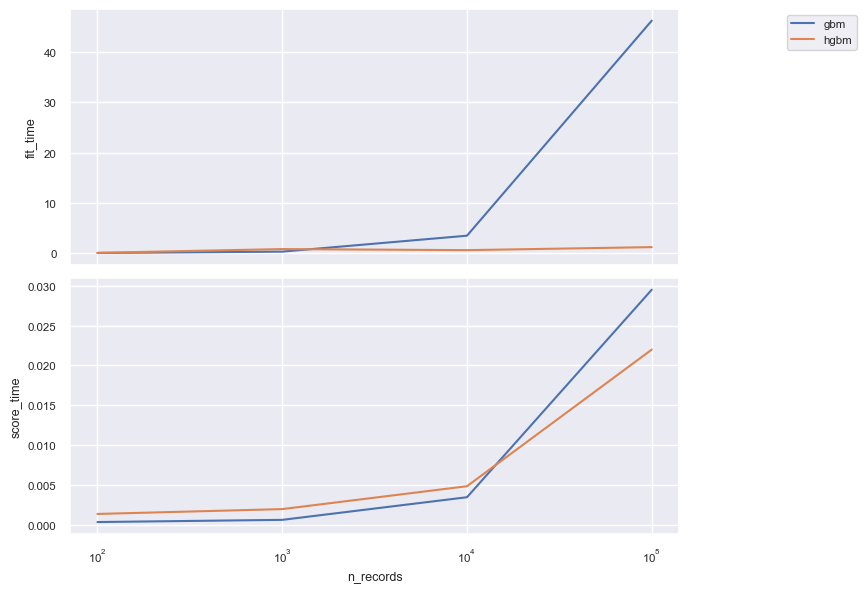

In [153]:
fig, ax = plt.subplots(2, 1, figsize=(9,6), sharex=True)
sns.lineplot(data=summary['fit_time'].reset_index(), 
             x='n_records', y='fit_time', hue='model', ax=ax[0])
ax[0].legend(loc='upper right', bbox_to_anchor=(1.3, 1))
sns.lineplot(data=summary['score_time'].reset_index(), 
             x='n_records', y='score_time', hue='model', 
             legend=False, ax=ax[1])
ax[1].set_xscale('log')
fig.tight_layout();

# Therefore I'll choose hGBM instead of GBM